Utilization of Cv2 to compute object centroid and do curve fitting.

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
# Change the working directory
path_to_folder = "ENPM673/tutorials"
%cd /content/drive/My\ Drive/{path_to_folder}

/content/drive/My Drive/ENPM673/tutorials


In [3]:
# necessary imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

The following code cells contains some code for getting object_tracking.mp4 video from the drive and storing the processed output back into the drive

In [4]:
# Read a video
video_capture = cv2.VideoCapture('assets/object_tracking.mp4')

# Get video properties
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_capture.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output_video.mp4', fourcc, 192.3, (frame_width, frame_height), 0)

The following code cell contains code that processes each frame, extracts the required object from the frame, calculates the centroid and plots the centroid on the frame.

In [5]:
# necessary imports
from IPython.display import display, Image, clear_output

# defining lists for storing the coordinates of the frame
x_coord = []
y_coord = []

# defining variables that will help in capturing the required frame
frame_count = 0
framecapture = None
while True:
    ret, frame = video_capture.read()
    if not ret:
        break
    # convert the captured frame into grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)



    # Apply the logical not operation on the frame. This operation will convert the 0 ie, black values to true and
    # any vaues greater than 0 to false. This will help in extracting the pixels of the black object.
    # After this just use the nonzero function to extract pixel location of those pixels that are black, ie, the pixels of the required object.
    # Finally put all this into a numpy aray
    non_zero = np.array(np.nonzero(np.logical_not(gray_frame)))
    # For checking if non_zero contains something. If yes then proceed for the centroid calulation
    if np.any(non_zero):
            # Calculate the max x coordinate, max y coordinate, min x coordinate, min y coordinate, average them to plot the centroid
            min_x = np.min(non_zero[1])
            min_y = np.min(non_zero[0])
            max_x = np.max(non_zero[1])
            max_y = np.max(non_zero[0])

            center_x = int((max_x + min_x) / 2)

            center_y = int((max_y + min_y )/ 2)

            # Add x coordinate of centroid and y coordinate of the centroid into lists
            x_coord.append(center_x)
            y_coord.append(center_y)

            # Draw center at the center of the object in each frame
            center = (center_x, center_y)

            cv2.circle(frame, center, 5, (0, 255, 0), -1)
            out.write(frame)

    #For capturing a specific frame
    if frame_count == 449:
        framecapture = frame

    frame_count += 1

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
# # Release VideoCapture and VideoWriter objects
out.release()
cv2.destroyAllWindows()


The following code cell contains code to calculate the points of the centroid through the least squares method

In [6]:
import numpy as np

x_squares = []

# Create squares of the x values

for ele in (x_coord):
    x_squares.append(ele ** 2)

#convert the arrays into numpy arrays
x_coord = np.array(x_coord)
y_coord = np.array(y_coord)
x_squares = np.array(x_squares)
A = np.column_stack((x_squares , x_coord , np.ones(len(x_coord))))
#Calculation through least squares
inverse = np.linalg.inv(A.T @ A)
result = inverse @ A.T @ y_coord
#Calculation of y coordiates through x coordinates
exp = result[0] * x_squares + result[1] * x_coord + result[2]

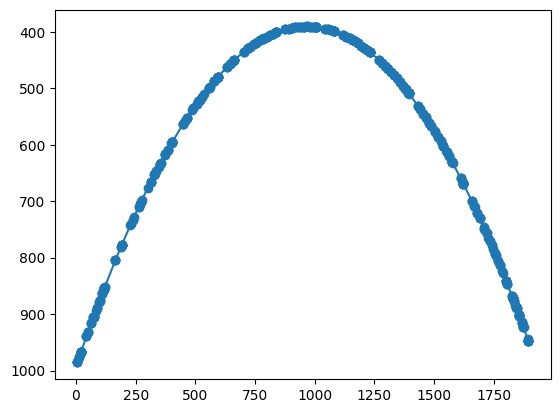

In [7]:
#Plotting scatter points and the curve for a parabola
plt.gca().invert_yaxis()
plt.scatter(x_coord , exp)
plt.plot(x_coord , exp)
plt.show()

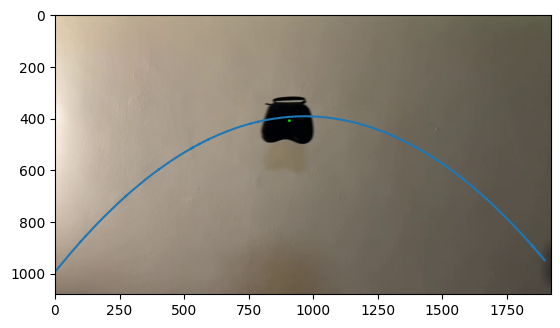

In [8]:
#Plotting the parabola on a captured frame
obs = cv2.cvtColor(framecapture , cv2.COLOR_BGR2RGB)
plt.imshow(obs)
plt.plot(x_coord , exp)
plt.show()